In [13]:
import sys
import os
from timeit import default_timer as timer
import torch
from transformers import RobertaTokenizer, RobertaModel, RobertaForMaskedLM, RobertaConfig
import matplotlib.pyplot as plt
# % matplotlib inline
from scipy.spatial.distance import cosine

In [2]:
# Make sure we're in the transformers directory with fine-tuned model output.
os.chdir('/home/jupyter/Notebooks/crystal/NLP/transformers/examples/')
os.getcwd()

'/home/jupyter/Notebooks/crystal/NLP/transformers/examples'

In [3]:
# Adapted from the tutorial at https://mccormickml.com/2019/05/14/BERT-word-embeddings-tutorial/
# and Transformers documentation: https://huggingface.co/transformers/model_doc/roberta.html#robertaformaskedlm

In [ ]:
################################### BEGIN TESTING #####################################################

In [9]:
vocab_file = '/home/jupyter/Notebooks/crystal/NLP/MiFace/Python/data/vocab_files/vocab_checked.txt'
vocab = make_vocab(vocab_file)
print(vocab[:10])
print(len(vocab))

['aback', 'abashed', 'abhor', 'abhorred', 'abhorrence', 'abhorrent', 'abominable', 'abound', 'absent', 'absorbed']
2187


In [51]:
tokenizer = RobertaTokenizer.from_pretrained('./output_CC-ab/')
config = RobertaConfig.from_pretrained('./output_CC-ab/')
model = RobertaForMaskedLM.from_pretrained('./output_CC-ab/', config=config)
# Outputting hidden states allows direct access to hidden layers of the model.
config.output_hidden_states = True
model.eval()

RobertaForMaskedLM(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

In [143]:
# Define a new example sentence with multiple contexts for the word "abhorred"
test_text = "She made an abhorred expression as he began making excuses. He wanted to keep playing, but abhorred the poor sportsmanship of his fellows."

# Split the sentence into tokens.
tokenized_test_text = tokenizer.encode(test_text, add_special_tokens=True)

# Display the words with their indeces.
for t in tokenized_test_text[1:-1]:
        print('{:<12} {:>6,}'.format(tokenizer.decode(t).strip(), t))
        
print(tokenizer.decode(tokenized_test_text))

She             264
made            156
an               41
abhor        35,350
red           2,050
expression    8,151
as               25
he               37
began           880
making          442
excuses      19,791
.                 4
He               91
wanted          770
to                7
keep            489
playing         816
,                 6
but              53
abhor        35,350
red           2,050
the               5
poor          2,129
sports        1,612
manship      17,187
of                9
his              39
fellows      36,304
.                 4
<s> She made an abhorred expression as he began making excuses. He wanted to keep playing, but abhorred the poor sportsmanship of his fellows.</s>


In [37]:
# tokens_tensor = torch.tensor([tokenized_test_text])

In [58]:
input_ids = torch.tensor(tokenized_test_text).unsqueeze(0)  # Batch size 1
with torch.no_grad():
    outputs = model(input_ids, masked_lm_labels=input_ids)
    # Documentation for the "forward" method of RobertaForMaskedLM
    # details what is returned for each index of "outputs."
    # print(outputs[0])  # masked_lm_loss
    # print(outputs[1])  # prediction_scores
    print(outputs[2])  # hidden_states

(tensor([[[ 0.1821, -0.0584, -0.0180,  ..., -0.0704,  0.1026, -0.0030],
         [-0.1530, -0.0148,  0.1621,  ..., -0.0165,  0.0989,  0.2619],
         [-0.1659, -0.2194,  0.6360,  ...,  0.0112, -0.6962,  0.0143],
         ...,
         [-0.0603, -0.6785,  0.3369,  ..., -0.1608, -0.1464,  0.4502],
         [ 0.2217,  0.0367,  0.0914,  ..., -0.8357,  0.0687,  0.0556],
         [ 0.0619, -0.0906, -0.0385,  ...,  0.4705,  0.0345, -0.1859]]]), tensor([[[-0.0529,  0.0224,  0.0254,  ...,  0.0015,  0.0220, -0.1526],
         [ 0.0337,  0.0747,  0.1383,  ...,  0.2554,  0.2624,  0.6075],
         [-0.2280, -0.4853,  0.9908,  ..., -0.1713, -0.9801,  0.2253],
         ...,
         [-0.3420, -0.4283, -0.2935,  ...,  0.0829,  0.0355,  0.2964],
         [-0.1282,  0.1487,  0.2648,  ..., -0.2111, -0.0344, -0.1823],
         [-0.2712,  0.4222,  0.0146,  ...,  0.4811, -0.1373, -0.6872]]]), tensor([[[ 4.9576e-02,  4.7782e-02,  1.0115e-02,  ...,  1.5301e-02,
           7.0869e-04, -6.6151e-02],
        

In [59]:
print ("Number of layers:", len(outputs[2]))
layer_i = 0

print ("Number of batches:", len(outputs[2][layer_i]))
batch_i = 0

print ("Number of tokens:", len(outputs[2][layer_i][batch_i]))
token_i = 0

print ("Number of hidden units:", len(outputs[2][layer_i][batch_i][token_i]))

Number of layers: 13
Number of batches: 1
Number of tokens: 32
Number of hidden units: 768


In [86]:
encoded_layers = outputs[2]

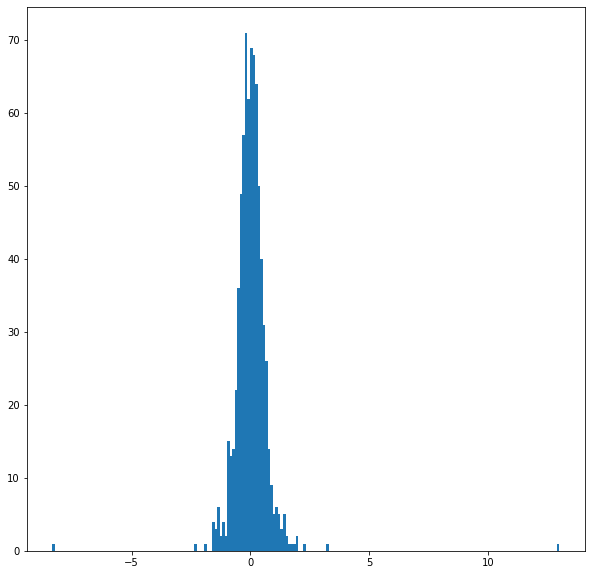

In [91]:
# For our token, select its feature values from layer 5.
token_i = 4
layer_i = 5
vec = encoded_layers[layer_i][batch_i][token_i]
# print(vec)

# Plot the values as a histogram to show their distribution.
plt.figure(figsize=(10,10))
plt.hist(vec, bins=200)
plt.show()

In [74]:
# `encoded_layers` is a tuple.
print('     Type of encoded_layers: ', type(list(encoded_layers)))

# Each layer in the list is a torch tensor.
print('Tensor shape for each layer: ', encoded_layers[0].size())

     Type of encoded_layers:  <class 'list'>
Tensor shape for each layer:  torch.Size([1, 32, 768])


In [75]:
# Concatenate the tensors for all layers. We use `stack` here to
# create a new dimension in the tensor.
token_embeddings = torch.stack(encoded_layers, dim=0)

token_embeddings.size()

torch.Size([13, 1, 32, 768])

In [76]:
# Remove dimension 1, the "batches".
token_embeddings = torch.squeeze(token_embeddings, dim=1)

token_embeddings.size()

torch.Size([13, 32, 768])

In [94]:
# Swap dimensions 0 and 1.
token_embeddings = token_embeddings.permute(1,0,2)

token_embeddings.size()

torch.Size([32, 13, 768])

In [103]:
for i, token_str in enumerate(tokenized_test_text):
      if tokenizer.decode(token_str).strip() == "disgusted":
        print (i, tokenizer.decode(token_str))

4  disgusted
21  disgusted


In [97]:
# Create token vectors by summing the last 4 layers of the model.
# Stores the token vectors, with shape [32 x 768]
token_vecs_sum = []
# `token_embeddings` is a [32 x 12 x 768] tensor.

# For each token in the sentence...
for token in token_embeddings:
    # `token` is a [13 x 768] tensor
    # Sum the vectors from the last four layers.
    sum_vec = torch.sum(token[-4:], dim=0)
    
    # Use `sum_vec` to represent `token`.
    token_vecs_sum.append(sum_vec)

print ('Shape is: %d x %d' % (len(token_vecs_sum), len(token_vecs_sum[0])))
# Shape is: 32 x 768

Shape is: 32 x 768


In [99]:
# Extract the last layer's features
token_vecs_last = []
# `token_embeddings` is a [32 x 12 x 768] tensor.

# For each token in the sentence...
for token in token_embeddings:
    # `token` is a [13 x 768] tensor
    # Extract the vector from the last layer.
    last_vec = token[-1]
    
    # Use `sum_vec` to represent `token`.
    token_vecs_last.append(last_vec)

print ('Shape is: %d x %d' % (len(token_vecs_last), len(token_vecs_last[0])))
# Shape is: 32 x 768

Shape is: 32 x 768


In [109]:
# Extract the embedding layer's features (layer 0 is the embedding layer)
token_vecs_embed = []
# `token_embeddings` is a [32 x 12 x 768] tensor.

# For each token in the sentence...
for token in token_embeddings:
    # `token` is a [13 x 768] tensor
    # Extract the vector from the last layer.
    embed_vec = token[0]
    
    # Use `sum_vec` to represent `token`.
    token_vecs_embed.append(last_vec)

print ('Shape is: %d x %d' % (len(token_vecs_embed), len(token_vecs_embed[0])))
# Shape is: 32 x 768

Shape is: 32 x 768


In [129]:
indices = []
for i, token_str in enumerate(tokenized_test_text):
      if tokenizer.decode(token_str).strip() == "disgusted":
        indices.append(i)
print(indices)

[4, 21]


In [130]:
token_vecs_sum_last_four = sum_last_four_token_vecs(token_embeddings)
for i in range(len(indices)):
    print(f'disgusted at index {indices[i]}: {str(token_vecs_sum_last_four[indices[i]][:5])}')

Shape is: 32 x 768
disgusted at index 4: tensor([-0.7637, -1.0375, -0.4840, -0.2251, -0.1792])
disgusted at index 21: tensor([-0.8459, -0.2973, -0.3336, -0.6372, -0.7399])


In [224]:
for i, v in enumerate(vocab):
    print(i, v)

0 open
1 openness
2 opposed
3 oppositional
4 oppressed
5 optimism
6 optimistic
7 ordering
8 orgasmic
9 ornery
10 ouch
11 out
12 outburst
13 outcry
14 outed
15 outlandish
16 outrage
17 outraged
18 outspoken
19 overbearing
20 overexcited
21 overjoyed
22 overshadowed
23 overstrung
24 overwhelmed
25 overworked
26 overwrought
27 pain
28 pained
29 painful
30 painfully
31 panic
32 panicked
33 panicky
34 paralyzed
35 paranoid
36 passionate
37 passive
38 patience
39 patient
40 patronizing
41 pause
42 pausing
43 peaceful
44 peculiar
45 peering
46 peeved
47 peevish
48 pensive
49 peppy
50 perceptive
51 perfidious
52 perky
53 perplexed
54 perplexing
55 persistent
56 personable
57 perturbed
58 perverse
59 pesky
60 pessimism
61 pessimistic
62 pestered
63 petitioning
64 petrified
65 petty
66 petulant
67 picked
68 piercing
69 pinched
70 pious
71 piqued
72 pissed
73 pitiable
74 pitiful
75 pity
76 pitying
77 placated
78 placation
79 placid
80 plain
81 plaintive
82 planning
83 playful
84 playfully
85 plea

In [229]:
v_indices = (102, 145, 309, 316, 410, 698)

start = 12
sections = []
for end in v_indices:
    for i in range(start, end):
#         print(i)
        sections.append(vocab[i])
        start = end + 1
for i in range(start, len(vocab)):
    sections.append(vocab[i])
#     print(i)

for i, v in enumerate(sections):
    print(i, v)

0 outburst
1 outcry
2 outed
3 outlandish
4 outrage
5 outraged
6 outspoken
7 overbearing
8 overexcited
9 overjoyed
10 overshadowed
11 overstrung
12 overwhelmed
13 overworked
14 overwrought
15 pain
16 pained
17 painful
18 painfully
19 panic
20 panicked
21 panicky
22 paralyzed
23 paranoid
24 passionate
25 passive
26 patience
27 patient
28 patronizing
29 pause
30 pausing
31 peaceful
32 peculiar
33 peering
34 peeved
35 peevish
36 pensive
37 peppy
38 perceptive
39 perfidious
40 perky
41 perplexed
42 perplexing
43 persistent
44 personable
45 perturbed
46 perverse
47 pesky
48 pessimism
49 pessimistic
50 pestered
51 petitioning
52 petrified
53 petty
54 petulant
55 picked
56 piercing
57 pinched
58 pious
59 piqued
60 pissed
61 pitiable
62 pitiful
63 pity
64 pitying
65 placated
66 placation
67 placid
68 plain
69 plaintive
70 planning
71 playful
72 playfully
73 pleading
74 pleasant
75 pleased
76 pleasing
77 pleasurable
78 pleasure
79 pleasured
80 pliant
81 plotting
82 poignant
83 pointed
84 poised


In [230]:
vocab = sections

In [111]:
# Calculate the cosine similarity between the word disgusted 
# in "disgusted expression" vs "too disgusted" (different contexts)
# using the last layer of the model.
diff_disgusted_last = 1 - cosine(token_vecs_last[4], token_vecs_last[21])

# Calculate the cosine similarity between the word disgusted 
# in "disgusted expression" vs "too disgusted" (different contexts)
# using the embed layer of the model.
diff_disgusted_embed = 1 - cosine(token_vecs_embed[4], token_vecs_embed[21])

# Calculate the cosine similarity between the word disgusted 
# in "disgusted expression" vs "too disgusted" (different contexts)
# using the sum of the last 4 layers of the model.
diff_disgusted_sum = 1 - cosine(token_vecs_sum_last_four[4], token_vecs_sum_last_four[21])

print('Vector similarity at the last layer:  %.2f' % diff_disgusted_last)
print('Vector similarity at the embed layer:  %.2f' % diff_disgusted_embed)
print('Vector similarity at the embed layer:  %.2f' % diff_disgusted_sum)

Vector similarity at the last layer:  0.91
Vector similarity at the embed layer:  1.00
Vector similarity at the embed layer:  0.89


In [ ]:
############################ END TESTING ##############################################################################

In [10]:
############################ START PRODUCTION: GET CONTEXTUAL EMBEDDINGS ##############################################

In [18]:
tokenizer = RobertaTokenizer.from_pretrained('./output_CC-ad/')
config = RobertaConfig.from_pretrained('./output_CC-ad/')
model = RobertaForMaskedLM.from_pretrained('./output_CC-ad/', config=config)
# Outputting hidden states allows direct access to hidden layers of the model.
config.output_hidden_states = True
model.eval()

context_file = "/home/jupyter/Notebooks/crystal/NLP/transformers/examples/CC_WET_test_ad"
output_file = '/home/jupyter/Notebooks/crystal/NLP/nlp_testing/embeddings_context_vocab/roberta_lastfour_CC_ad.txt'
count_file = '/home/jupyter/Notebooks/crystal/NLP/nlp_testing/embeddings_context_vocab/roberta_lastfour_CC_ad_counts.txt'
vocab_file = '/home/jupyter/Notebooks/crystal/NLP/MiFace/Python/data/vocab_files/vocab_checked.txt'
vocab = make_vocab(vocab_file)
# vocab = ["abhorrent"]

# Process vocabulary words in the outer loop.
for v in vocab:
    start = timer()
    with open(context_file, 'r') as lines:
        v_sum = torch.zeros([1, 768])
        v_tokens = tokenizer.encode(v)
        print(f'\nThere are {len(v_tokens) - 2} tokens in tokenized vocabulary word:')
        for t in v_tokens[1:-1]:
            print(tokenizer.decode(t).strip())
        count_sentence = 0
        count_tensor = 0
        
        # Process all lines in the context file in the inner loop.
        for line in lines:
            # Check for this vocab word; if found, split the line into individual sentences.
            for word in line.split():
                if v == word.lower():
                    for sentence in line.split('.'):
                        if v in sentence.lower():
                            line = sentence
                            count_sentence += 1
                            print(f'\nInstance {count_sentence} of {tokenizer.decode(v_tokens[1:-1]).strip()}.')
                            break
                    # Split the new sentence-based line into tokens.
                    # Use max_length to avoid overflowing the maximum sequence length for the model.
                    tokenized_text = tokenizer.encode(line, add_special_tokens=True, max_length=512)
    #                 print(f'The decoded sentence is: {tokenizer.decode(tokenized_text)}')
                    indices = []              

                    # Check to see whether the vocab word is found in this particular line.
                    # Initially, some lines may have comprised multiple sentences, which were
                    # broken out individually above.
                    for t in v_tokens[1:-1]:
                        print(f'Looking for vocab token: {tokenizer.decode(t).strip()}')
                        for i, token_str in enumerate(tokenized_text):
    #                         print(f'Next sentence token: {tokenizer.decode(token_str).strip()}')
    #                         print(tokenizer.decode(token_str).strip() == tokenizer.decode(t).strip())
                            if tokenizer.decode(token_str).strip() == tokenizer.decode(t).strip():
                                indices.append(i)               
                    
                    ###################################################################################
                    # If the vocabulary word was found, process the containing line.
                    if indices:

                        # The vocab word was found in this line/sentence, at the locations in indices.
                        print(f'Indices are {indices}')
                        # Get the feature vectors for all tokens in the line/sentence.
                        token_embeddings = create_token_embeddings(tokenized_text)
                        # Sum the last four layers to get embeddings for the line/sentence.
#                         for t in v_tokens[1:-1]:
#                             for i, token_str in enumerate(tokenized_text):
#                                 if (tokenizer.decode(token_str).strip() == tokenizer.decode(t).strip()):
#                                     print(f'{tokenizer.decode(token_str).strip()} is index {i} in the sentence and {token_str} in the vocabulary.')
                        token_vecs_sum_last_four = sum_last_four_token_vecs(token_embeddings)

                        # Get the vocab word's contextual embedding for this line.
                        tensor_sum = torch.zeros([1, 768])
                        for i in range(len(indices)):
                            v_index = i % len(v_tokens[1:-1])
#                             print(f'{tokenizer.decode(v_tokens[v_index + 1]).strip()} at index {indices[i]}: {token_vecs_sum_last_four[indices[i]][:5].tolist()}')
                            tensor_sum += token_vecs_sum_last_four[indices[i]]
#                             print(f'Sum of tensors is: {tensor_sum[0][:5].tolist()} before taking the mean.')

                        # If our vocab word is broken into more than one token, we need to get the mean of the token embeddings.
                        tensor_sum /= len(indices)
#                         print(f'Sum of tensors is: {tensor_sum[0][:5].tolist()} after taking the mean.')

                        # Add the embedding distilled from this line to the sum of embeddings for all lines.
                        v_sum += tensor_sum
                        count_tensor += 1
                        print(f'Grand sum of {count_tensor} tensor sets is: {v_sum[0][:5].tolist()}')
                    ###################################################################################
        
        # We're done processing all lines of 512 tokens or less containing our vocab word.
        # Get the mean embedding for the word.
        v_mean = v_sum / count_tensor
        print(f'Mean of tensors is: {v_mean[0][:5]} ({len(v_mean[0])} features in tensor)')
        write_embedding(output_file, v, v_mean)
        try:
            with open(count_file, 'a') as counts:
                counts.write(v + ', ' + str(count_tensor) + '\n')
            print(f'Saved the count of sentences used to create {v} embedding')
        except:
            print('Wha?! Could not write the sentence count.')
    end = timer()
    print(f'Run time for {v} was {end - start} seconds.')


There are 2 tokens in tokenized vocabulary word:
abhor
rent

Instance 1 of abhorrent.
Looking for vocab token: abhor
Looking for vocab token: rent
Indices are [25, 26]
Size of token embeddings is torch.Size([67, 13, 768])
Shape of summed layers is: 67 x 768
Grand sum of 1 tensor sets is: [-0.3465070426464081, -0.26909250020980835, 0.9092590808868408, -0.8468492031097412, -1.433544635772705]

Instance 2 of abhorrent.
Looking for vocab token: abhor
Looking for vocab token: rent
Indices are [16, 17]
Size of token embeddings is torch.Size([512, 13, 768])
Shape of summed layers is: 512 x 768
Grand sum of 2 tensor sets is: [-0.1164095401763916, -0.012080848217010498, 0.7741882801055908, -0.2955843210220337, -4.041757106781006]

Instance 3 of abhorrent.
Looking for vocab token: abhor
Looking for vocab token: rent
Indices are [2, 3]
Size of token embeddings is torch.Size([15, 13, 768])
Shape of summed layers is: 15 x 768
Grand sum of 3 tensor sets is: [-0.6819230318069458, 0.9531643986701965,


Instance 26 of abhorrent.
Looking for vocab token: abhor
Looking for vocab token: rent
Indices are [6, 7]
Size of token embeddings is torch.Size([34, 13, 768])
Shape of summed layers is: 34 x 768
Grand sum of 26 tensor sets is: [6.2914533615112305, 24.996583938598633, 11.573391914367676, 29.902549743652344, -5.4072723388671875]

Instance 27 of abhorrent.
Looking for vocab token: abhor
Looking for vocab token: rent
Indices are [47, 48]
Size of token embeddings is torch.Size([53, 13, 768])
Shape of summed layers is: 53 x 768
Grand sum of 27 tensor sets is: [6.100966453552246, 26.199033737182617, 11.841325759887695, 30.89087677001953, -5.768375396728516]

Instance 28 of abhorrent.
Looking for vocab token: abhor
Looking for vocab token: rent
Indices are [10, 11]
Size of token embeddings is torch.Size([40, 13, 768])
Shape of summed layers is: 40 x 768
Grand sum of 28 tensor sets is: [6.430902004241943, 26.453746795654297, 11.177207946777344, 34.70381546020508, -5.435405731201172]

Instance


Instance 51 of abhorrent.
Looking for vocab token: abhor
Looking for vocab token: rent
Indices are [3]
Size of token embeddings is torch.Size([21, 13, 768])
Shape of summed layers is: 21 x 768
Grand sum of 51 tensor sets is: [13.471503257751465, 52.194358825683594, 24.993192672729492, 56.55504608154297, -2.0781655311584473]

Instance 52 of abhorrent.
Looking for vocab token: abhor
Looking for vocab token: rent
Indices are [37, 38]
Size of token embeddings is torch.Size([68, 13, 768])
Shape of summed layers is: 68 x 768
Grand sum of 52 tensor sets is: [13.445563316345215, 53.202362060546875, 25.843955993652344, 57.84526062011719, -0.4651474952697754]

Instance 53 of abhorrent.
Looking for vocab token: abhor
Looking for vocab token: rent
Indices are [12, 13]
Size of token embeddings is torch.Size([23, 13, 768])
Shape of summed layers is: 23 x 768
Grand sum of 53 tensor sets is: [13.680488586425781, 54.29458999633789, 26.747678756713867, 59.74357986450195, 0.45876985788345337]

Instance 

In [4]:
def make_vocab(vocab_file):
    vocab = []
    with open(vocab_file, 'r') as v:
        vocab = v.read().splitlines()
    return vocab

In [5]:
def create_token_embeddings(tokenized_text):
    input_ids = torch.tensor(tokenized_text).unsqueeze(0)  # Batch size 1
    with torch.no_grad():
        outputs = model(input_ids, masked_lm_labels=input_ids)
        encoded_layers = outputs[2]
        token_embeddings = torch.stack(encoded_layers, dim=0)
        token_embeddings = torch.squeeze(token_embeddings, dim=1)
        token_embeddings = token_embeddings.permute(1,0,2)
        print(f'Size of token embeddings is {token_embeddings.size()}')
        return token_embeddings

In [6]:
# Sum the last 4 layers' features
def sum_last_four_token_vecs(token_embeddings):
    token_vecs_sum_last_four = []
    # `token_embeddings` is a [32 x 12 x 768] tensor.

    # For each token in the sentence...
    for token in token_embeddings:
        # `token` is a [13 x 768] tensor
        # Sum the vectors from the last 4 layers.
        sum_vec = torch.sum(token[-4:], dim=0)

        # Use `sum_vec` to represent `token`.
        token_vecs_sum_last_four.append(sum_vec)

    print ('Shape of summed layers is: %d x %d' % (len(token_vecs_sum_last_four), len(token_vecs_sum_last_four[0])))
    # Shape is: <token count> x 768
    return token_vecs_sum_last_four

In [7]:
def write_embedding(embeddings_file, vocab_word, contextual_embedding):
    try:
        with open(embeddings_file, 'a') as f:
            f.write(vocab_word)
            for value in contextual_embedding[0]:
                f.write(' ' + str(value.item()))
            f.write('\n')
        print(f'Saved the embedding for {vocab_word}.')
    except:
        print('Oh no! Unable to write to the embeddings file.')